In [2]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
car=pd.read_csv('car_price_dataset.csv')


# **DATA CLEANING**

In [3]:
car.head()

Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867

In [4]:
car.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [6]:
car.shape

(10000, 10)

In [7]:
print(car.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [9]:
car = car.drop_duplicates()
print("Remaining rows after dropping duplicates:", len(car))

Remaining rows after dropping duplicates: 10000


In [11]:
car = car.dropna()

In [13]:
car.shape

(10000, 10)

# **LABEL ENCODING**

In [14]:
# Label encoding
le = LabelEncoder()
car['brand_encoded'] = le.fit_transform(car['Brand'])
car['model_encoded'] = le.fit_transform(car['Model'])
car['transmission_encoded'] = le.fit_transform(car['Transmission'])

# **OUTLIER DETECTION**

In [15]:
# Outlier detection function
def detect_outliers(df, column):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < 3]

numerical_columns = ['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']
for col in numerical_columns:
    car = detect_outliers(car, col)

# **UNIVARIATE ANALYSIS**

## Numerical Variables

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
car[numerical_columns].describe()

Year  Engine_Size        Mileage        Doors  Owner_Count  \
count  9998.000000  9998.000000    9998.000000  9998.000000  9998.000000   
mean   2011.541608     3.000190  149266.249250     3.496799     2.990898   
std       6.896788     1.149139   86309.650388     1.110004     1.422682   
min    2000.000000     1.000000      25.000000     2.000000     1.000000   
25%    2006.000000     2.000000   74670.500000     3.000000     2.000000   
50%    2012.000000     3.000000  149604.000000     3.000000     3.000000   
75%    2017.000000     4.000000  223596.500000     4.000000     4.000000   
max    2023.000000     5.000000  299947.000000     5.000000     5.000000   

              Price  
count   9998.000000  
mean    8851.079016  
std     3110.051750  
min     2000.000000  
25%     6646.000000  
50%     8858.000000  
75%    11085.500000  
max    18017.000000

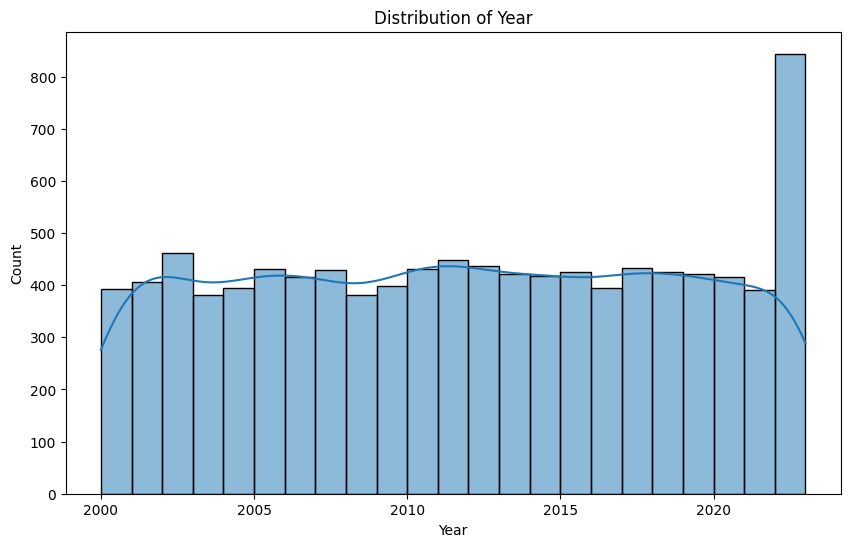

Year - Mean: 2011.54, SD: 6.90


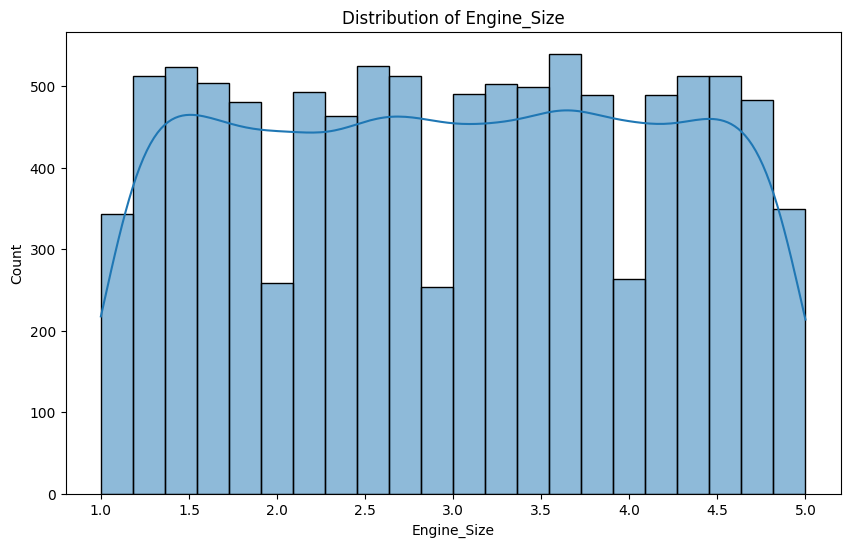

Engine_Size - Mean: 3.00, SD: 1.15


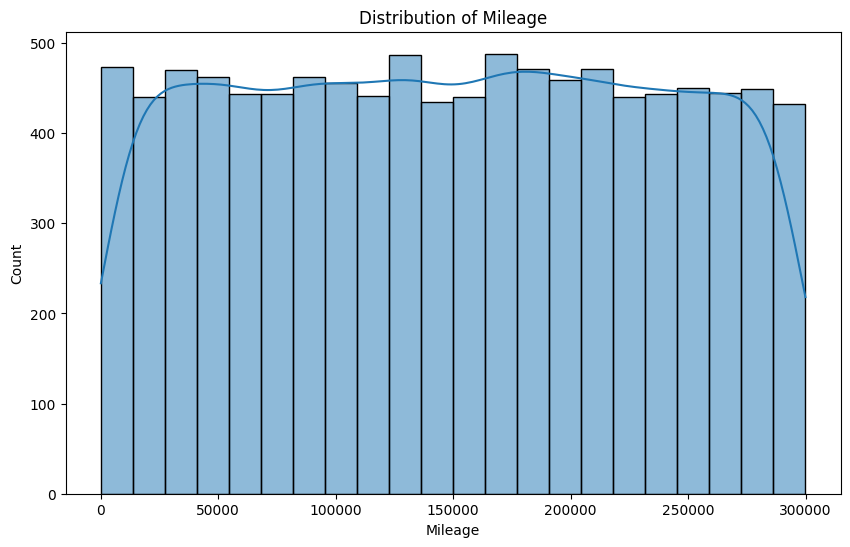

Mileage - Mean: 149266.25, SD: 86309.65


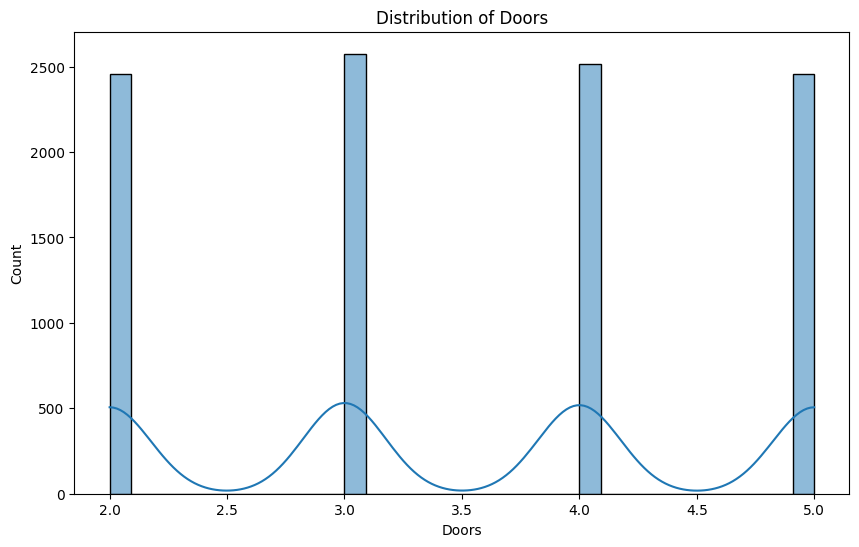

Doors - Mean: 3.50, SD: 1.11


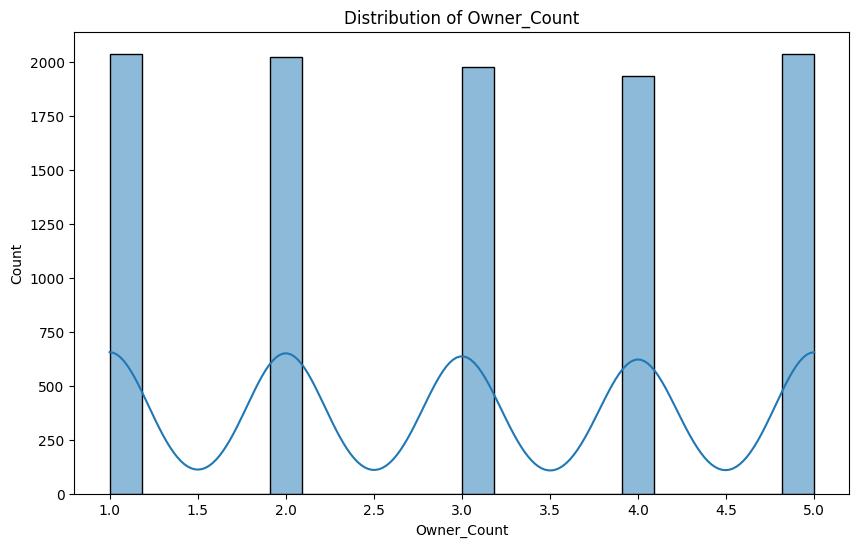

Owner_Count - Mean: 2.99, SD: 1.42


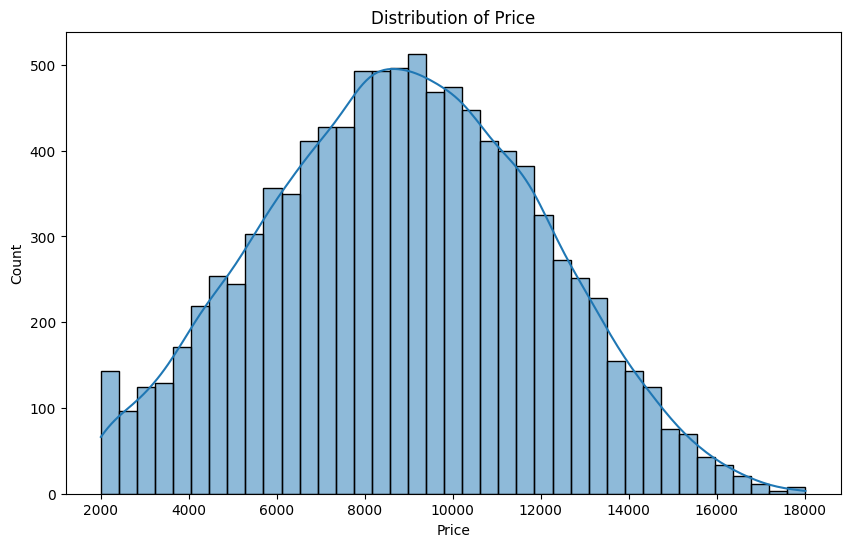

Price - Mean: 8851.08, SD: 3110.05


In [18]:
#Numerical Variables
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(car[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    print(f"{col} - Mean: {car[col].mean():.2f}, SD: {car[col].std():.2f}")

## Measures of Central Tendency

In [19]:
for col in ['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']:
    print(f"{col}:")
    print(f"Mean: {car[col].mean():.2f}")
    print(f"Median: {car[col].median():.2f}")
    print(f"Mode: {car[col].mode()[0]:.2f}\n")

Year:
Mean: 2011.54
Median: 2012.00
Mode: 2002.00

Engine_Size:
Mean: 3.00
Median: 3.00
Mode: 3.70

Mileage:
Mean: 149266.25
Median: 149604.00
Mode: 12478.00

Doors:
Mean: 3.50
Median: 3.00
Mode: 3.00

Owner_Count:
Mean: 2.99
Median: 3.00
Mode: 1.00

Price:
Mean: 8851.08
Median: 8858.00
Mode: 2000.00



## Measures of Dispersion

In [20]:
for col in ['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']:
    print(f"{col}:")
    print(f"Range: {car[col].max() - car[col].min():.2f}")
    print(f"Variance: {car[col].var():.2f}")
    print(f"Coefficient of Variation: {(car[col].std() / car[col].mean()) * 100:.2f}%\n")

Year:
Range: 23.00
Variance: 47.57
Coefficient of Variation: 0.34%

Engine_Size:
Range: 4.00
Variance: 1.32
Coefficient of Variation: 38.30%

Mileage:
Range: 299922.00
Variance: 7449355750.16
Coefficient of Variation: 57.82%

Doors:
Range: 3.00
Variance: 1.23
Coefficient of Variation: 31.74%

Owner_Count:
Range: 4.00
Variance: 2.02
Coefficient of Variation: 47.57%

Price:
Range: 16017.00
Variance: 9672421.89
Coefficient of Variation: 35.14%



## Box Plots for Numerical Variables

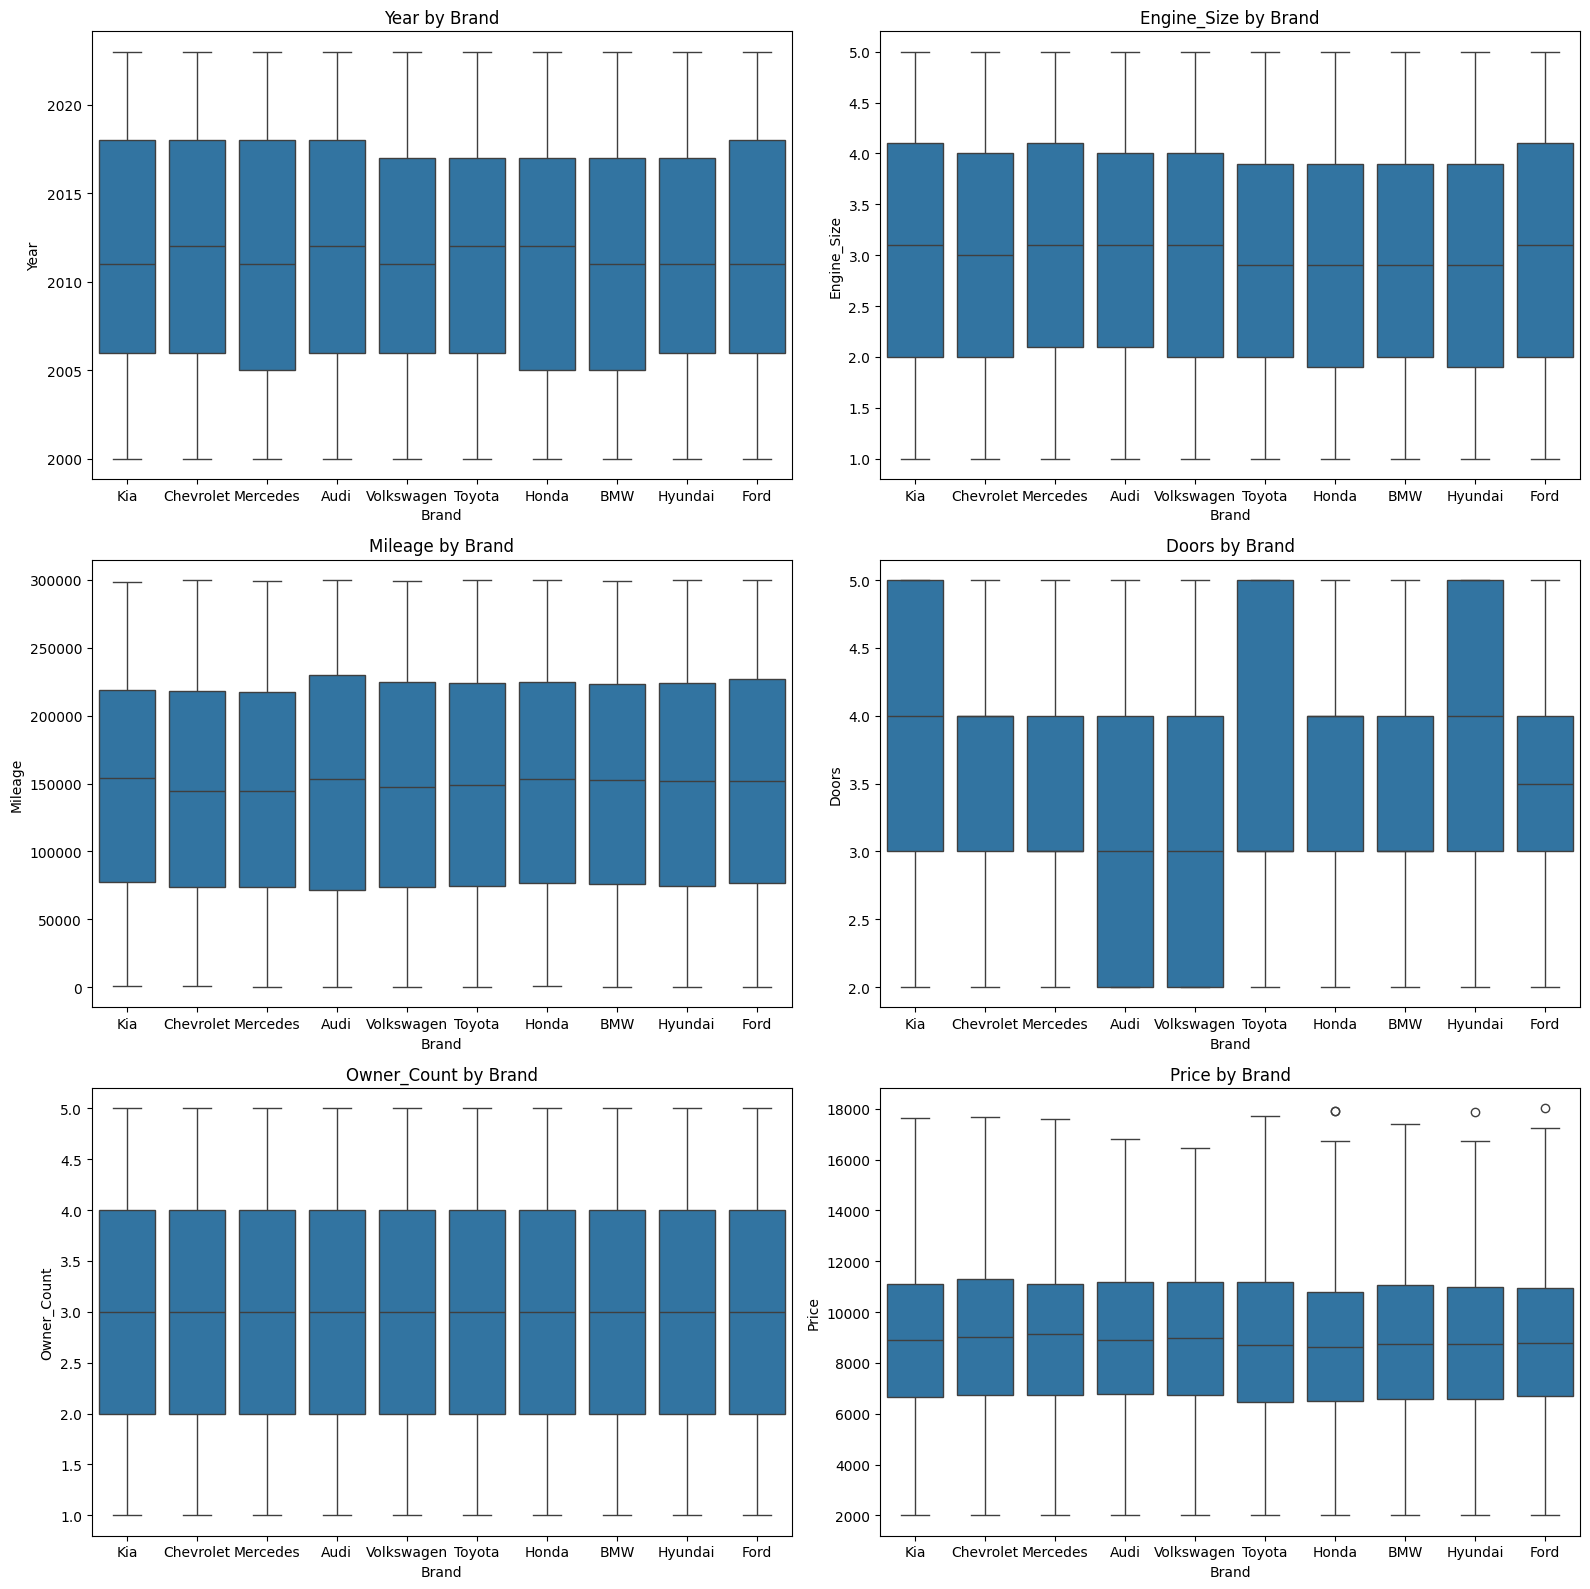

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

for i, col in enumerate(['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']):
    sns.boxplot(data=car, x='Brand', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Brand')
    axes[i].set_xlabel('Brand')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Violin Plots for Numerical Variables

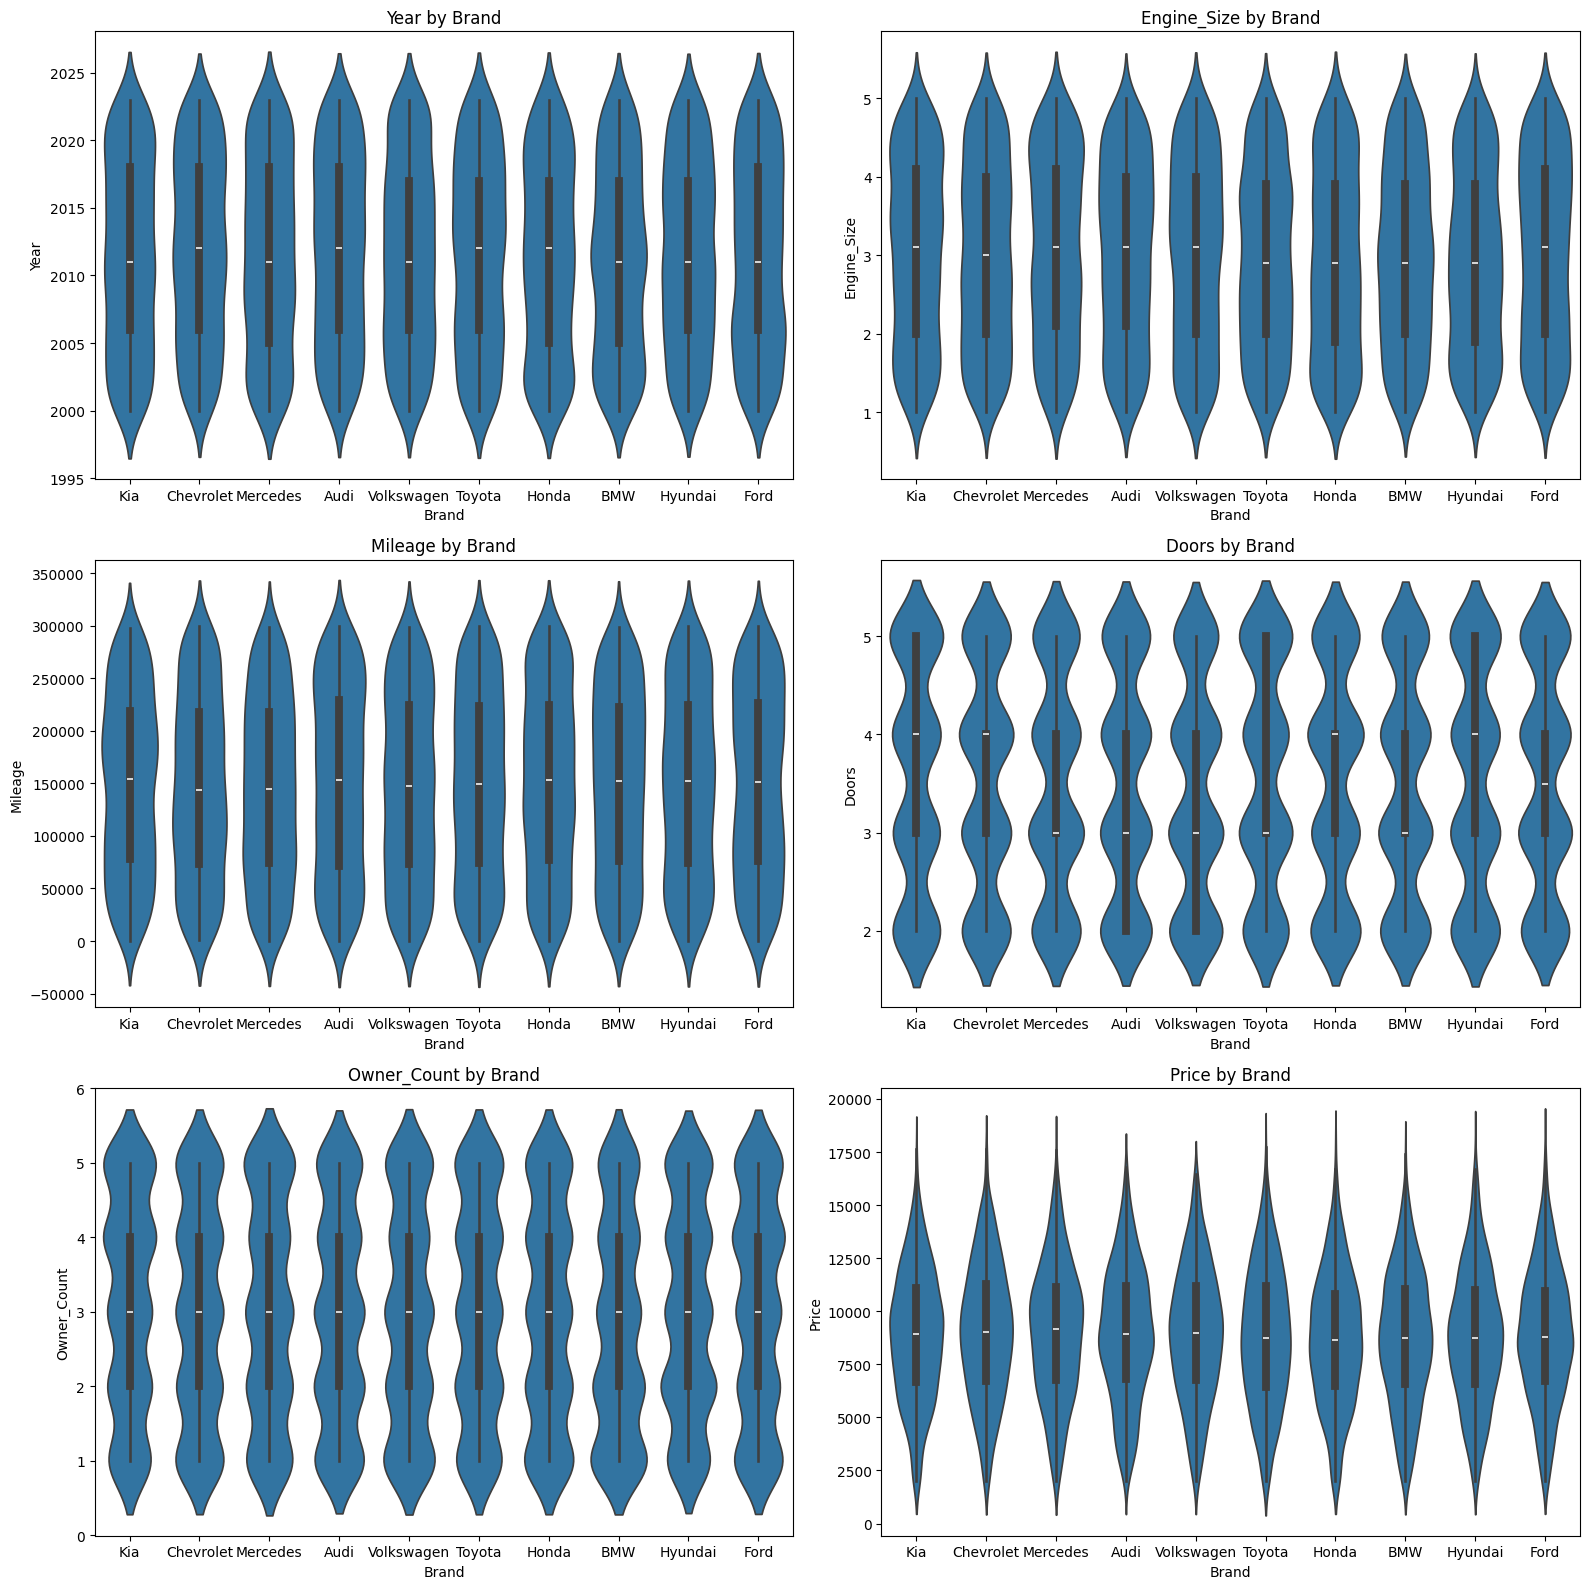

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
axes = axes.flatten()

for i, col in enumerate(['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']):
    sns.violinplot(data=car, x='Brand', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Brand')
    axes[i].set_xlabel('Brand')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Categorical Variable Visualization

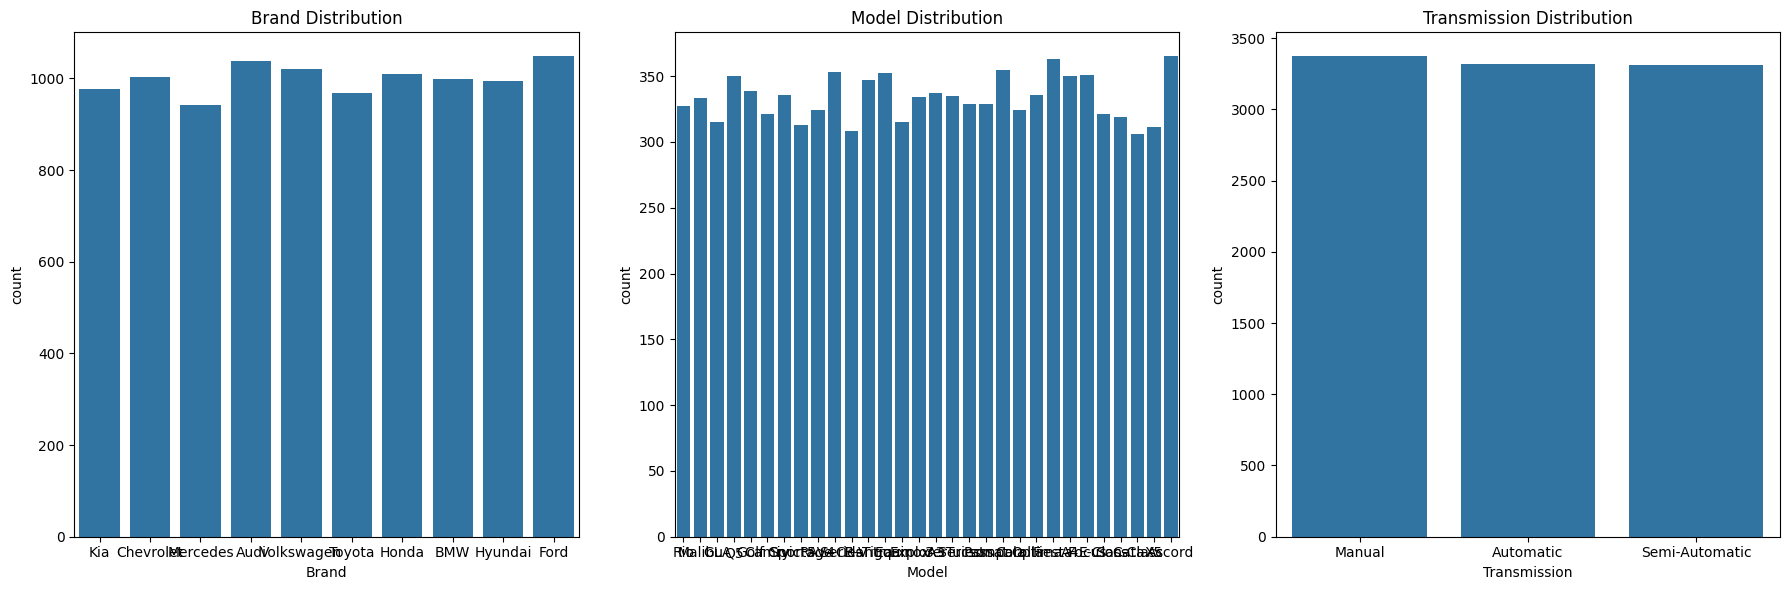

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=car, x='Brand', ax=axes[0])
axes[0].set_title('Brand Distribution')

sns.countplot(data=car, x='Model', ax=axes[1])
axes[1].set_title('Model Distribution')

sns.countplot(data=car, x='Transmission', ax=axes[2])
axes[2].set_title('Transmission Distribution')

plt.tight_layout()
plt.show()


## Skewness and Kurtosis

In [26]:
from scipy.stats import skew, kurtosis

for col in ['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']:
    print(f"{col}:")
    print(f"Skewness: {skew(car[col]):.2f}")
    print(f"Kurtosis: {kurtosis(car[col]):.2f}\n")


Year:
Skewness: -0.01
Kurtosis: -1.19

Engine_Size:
Skewness: -0.01
Kurtosis: -1.20

Mileage:
Skewness: 0.00
Kurtosis: -1.19

Doors:
Skewness: 0.01
Kurtosis: -1.34

Owner_Count:
Skewness: 0.02
Kurtosis: -1.31

Price:
Skewness: 0.02
Kurtosis: -0.49



## Kernel Density Distribution

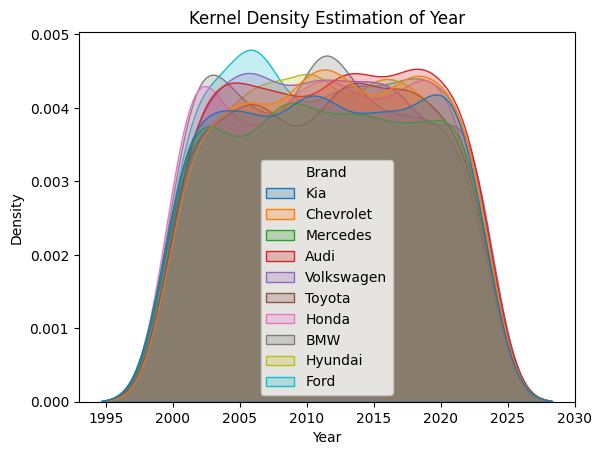

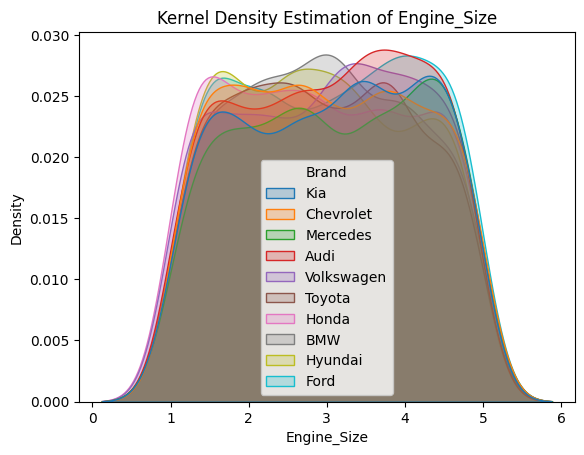

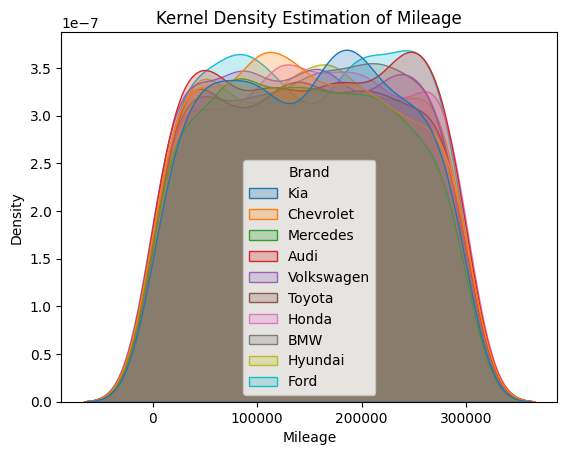

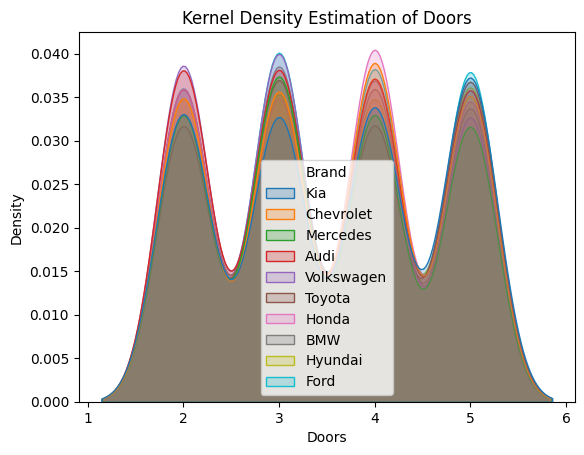

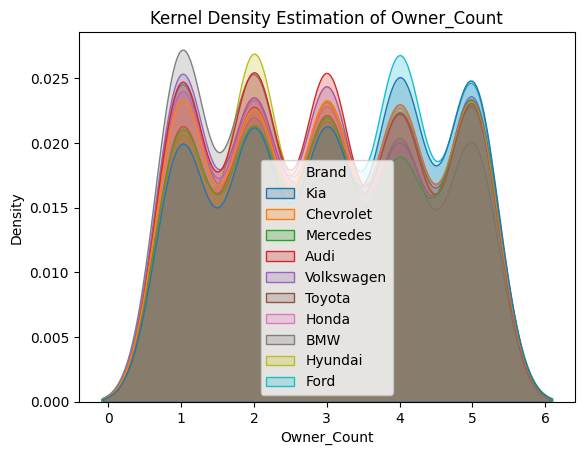

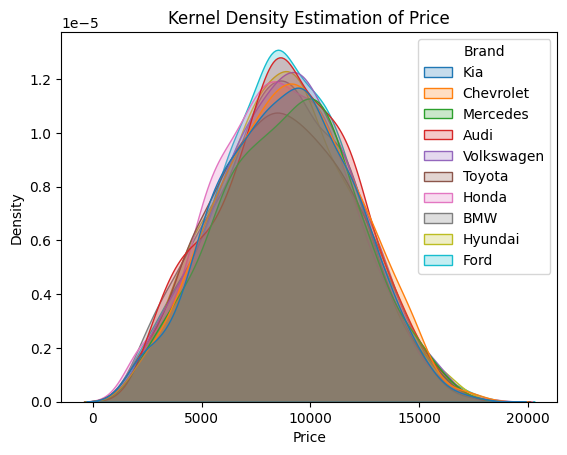

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']:
    sns.kdeplot(data=car, x=col, hue='Brand', fill=True)
    plt.title(f'Kernel Density Estimation of {col}')
    plt.show()


## Outliers using IQR

In [28]:
# Detect outliers using IQR
Q1 = car[numerical_columns].quantile(0.25)
Q3 = car[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values outside 1.5*IQR
outliers = ((car[numerical_columns] < (Q1 - 1.5 * IQR)) | (car[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 Year           0
Engine_Size    0
Mileage        0
Doors          0
Owner_Count    0
Price          4
dtype: int64


In [29]:
categorical_cols = ["Brand","Model","Transmission"]

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"Value counts for {col}:\n{car[col].value_counts()}\n")

Value counts for Brand:
Brand
Ford          1048
Audi          1037
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         969
Mercedes       942
Name: count, dtype: int64

Value counts for Model:
Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          337
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Passat      329
Tucson      329
Rio         327
RAV4        324
Corolla     324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64

Value counts for Transmission:
Transmission
Manual            3372
Automatic         3315
Semi-Automatic    3311
Name: count, dtype: int64



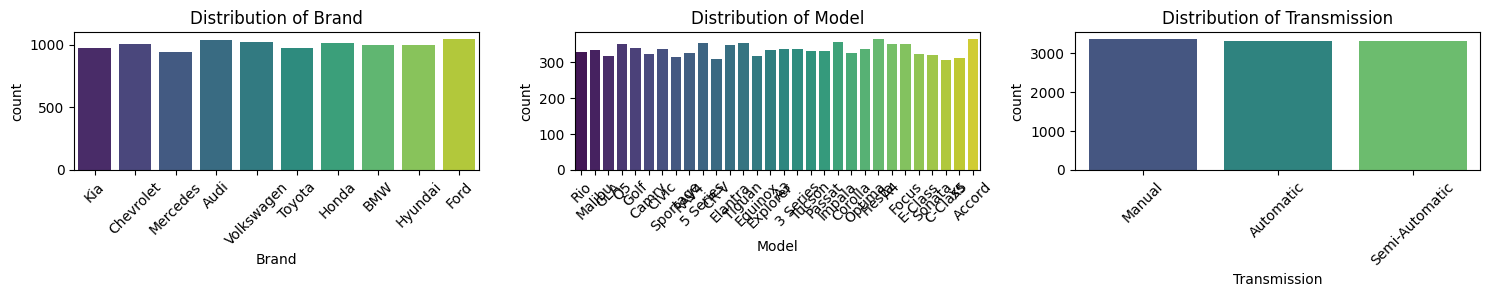

In [30]:
# Plot bar charts for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=car, x=col, hue=col, palette="viridis", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


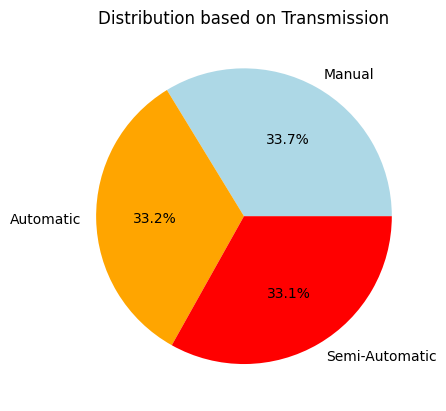

In [31]:
# Pie charts for Categorical Variables
car['Transmission'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange","red"])
plt.title("Distribution based on Transmission")
plt.ylabel('')
plt.show()

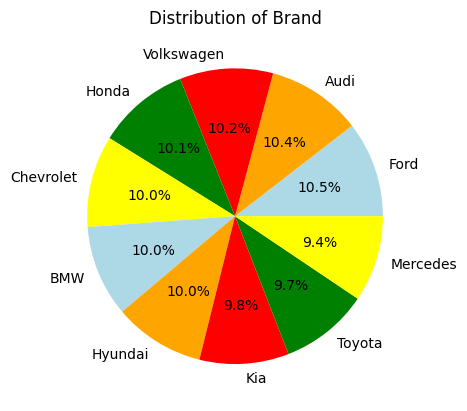

In [33]:
# Pie chart for 'Brand' (Target Variable)
car['Brand'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange","red","green","yellow"])
plt.title("Distribution of Brand")
plt.ylabel('')
plt.show()

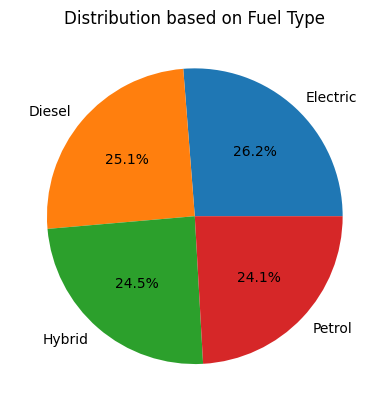

In [35]:
# Pie chart for 'Fuel type' (Target Variable)
car['Fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution based on Fuel Type")
plt.ylabel('')
plt.show()

# CONCLUSIONS FROM UNIVARIATE ANALYSIS

## Brand Distribution
 The dataset likely contains an uneven distribution of car brand. This imbalance should be considered when interpreting results or building predictive models.

## Morphological Characteristics:

1. Year: There is variation in year across the car brand, which could indicate differences between brand or model groups.

2. Fuel type: The distribution of fuel types may show distinct patterns, possibly correlating with fuel  or Brand-specific traits.

3. Engine size: Variations in engine size could reflect modelling to different purpose and driving purposes.

4. Mileage: The range and distribution of mileage provide insights into the overall mileage variation within the car type.

## Categorical Variables:

1. Model Distribution: The frequency of cars across different Models may reveal driving preferences or sampling biases.

2. Transmission Ratio: The distribution of transmission in  cars can indicate engine health and running potential.

#Data Quality
The presence or absence of outliers and the shape of distributions for numerical variables can indicate the overall quality and reliability of the dataset.

#Potential Research Focus
 Unusual patterns in any single variable might suggest areas for more focused research or additional data collection.


# **MULTIVARIATE ANALYSIS**

## Correlation Matrix (Numerical Variables Only)

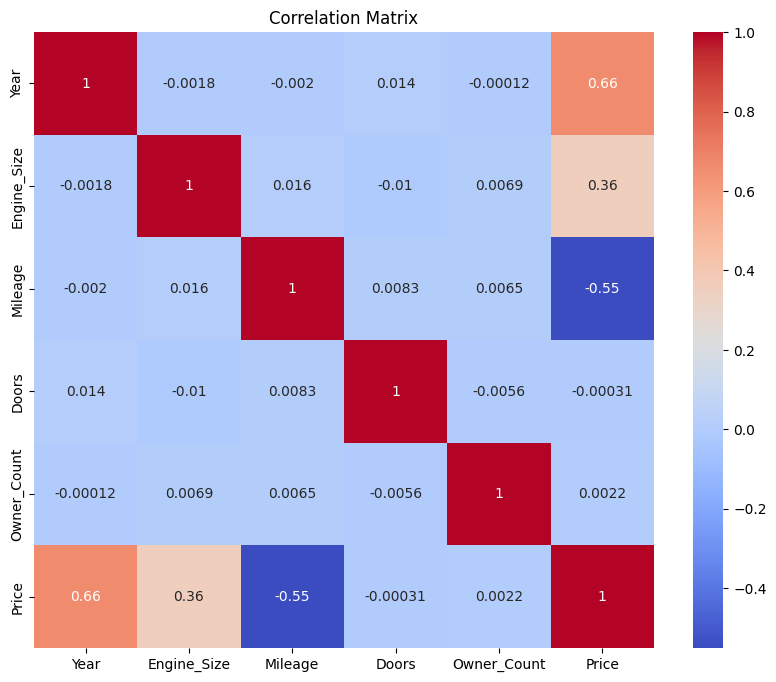

In [36]:
corr_matrix = car[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Scatter Plot with Regression lines

In [ ]:
sns.pairplot(car, hue='Fuel_Type', kind='reg')
plt.suptitle('Scatter Plot Matrix with Regression Lines', y=1.02)
plt.show()


## Correlation matrix (Numerical + Categorical Variables)


## Pairplot


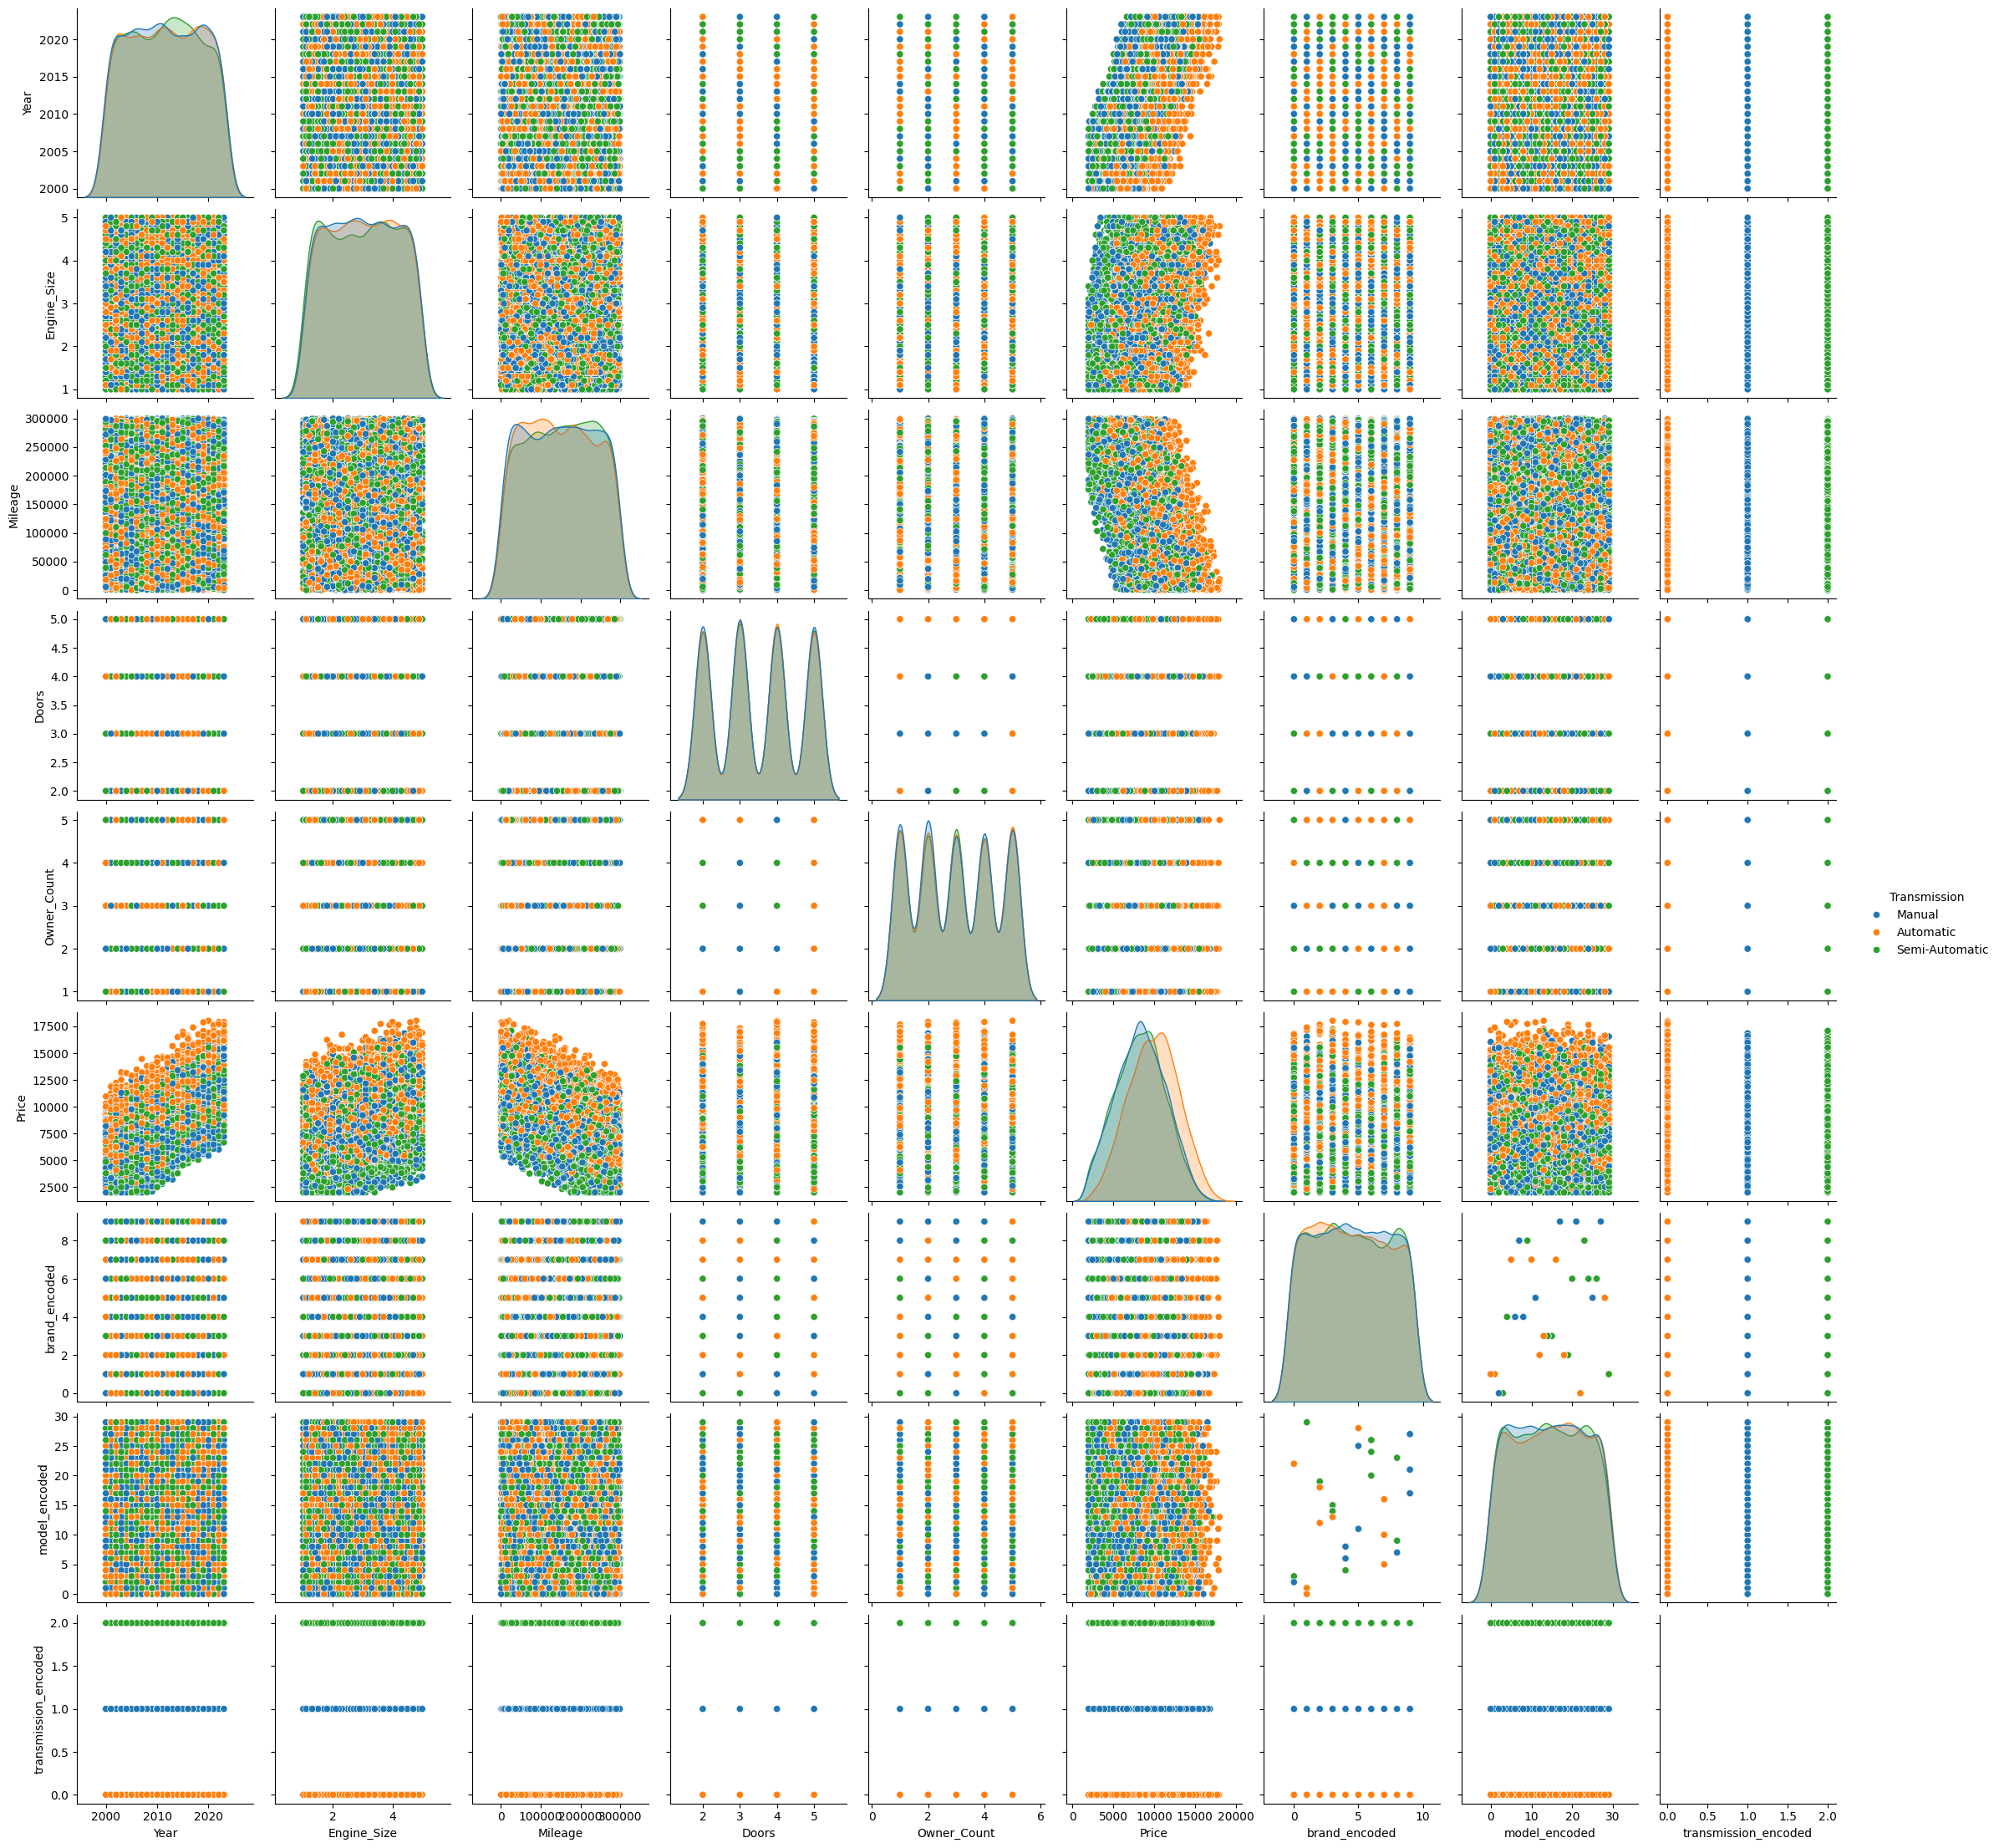

In [44]:
sns.pairplot(car, hue="Transmission", diag_kind="kde")
plt.show()

## Violin Plot

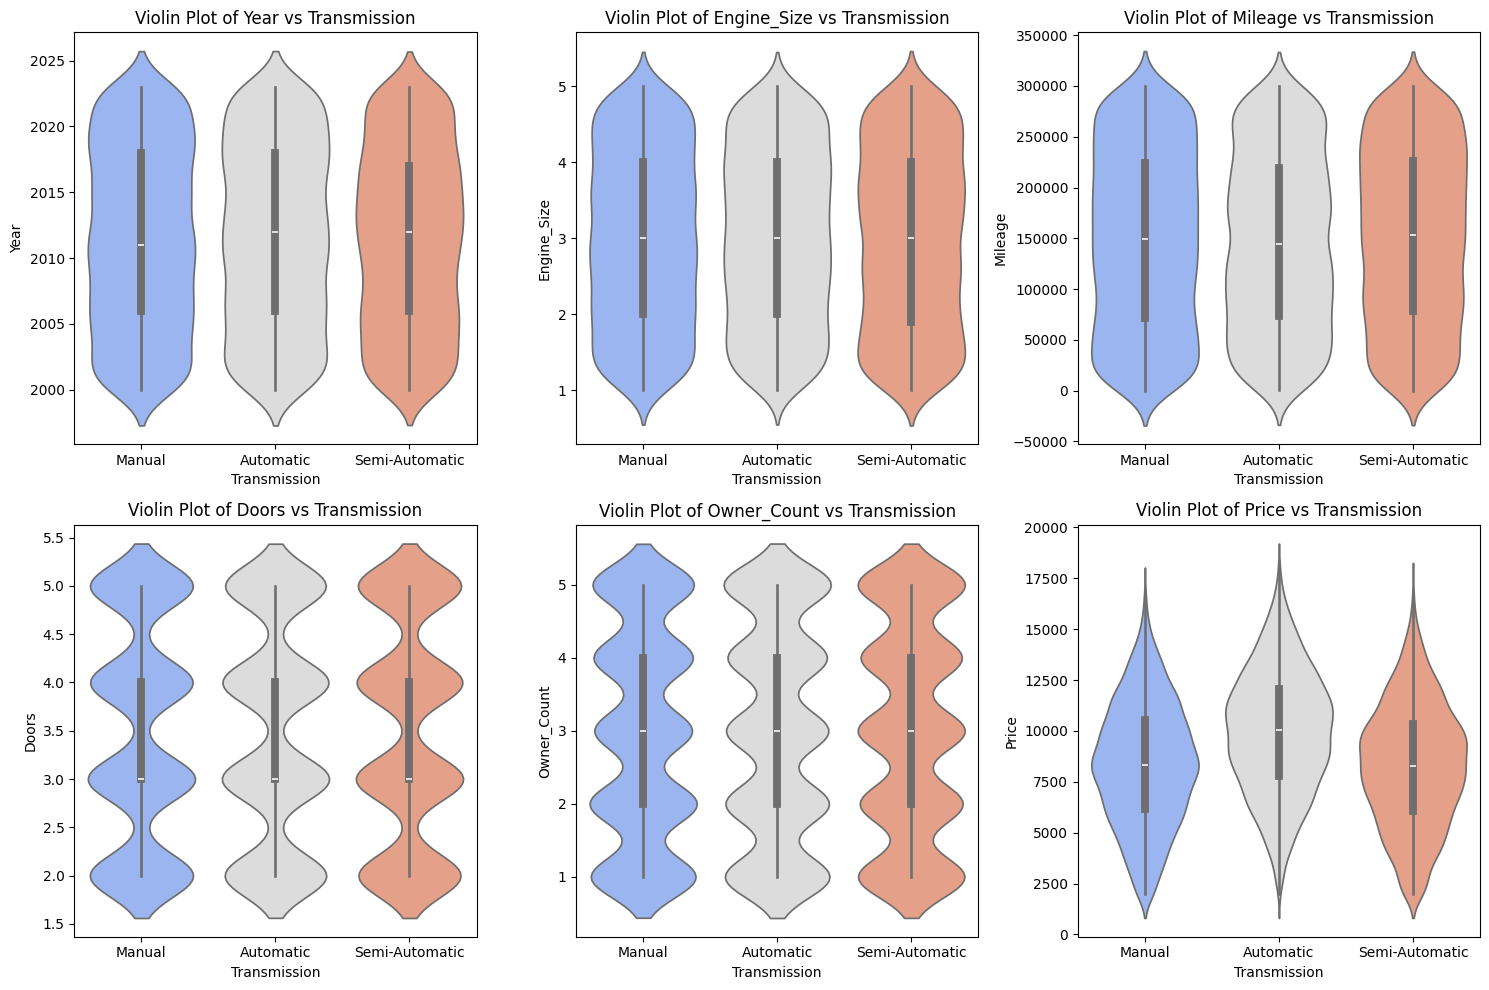

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features to plot
numerical_features = ['Year', 'Engine_Size', 'Mileage', 'Doors','Owner_Count','Price']

# Create violin plots for each numerical feature
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x="Transmission", y=col, data=car, palette="coolwarm", hue="Transmission", legend=False)
    plt.title(f"Violin Plot of {col} vs Transmission")

plt.tight_layout()
plt.show()

## Faceted Histogram


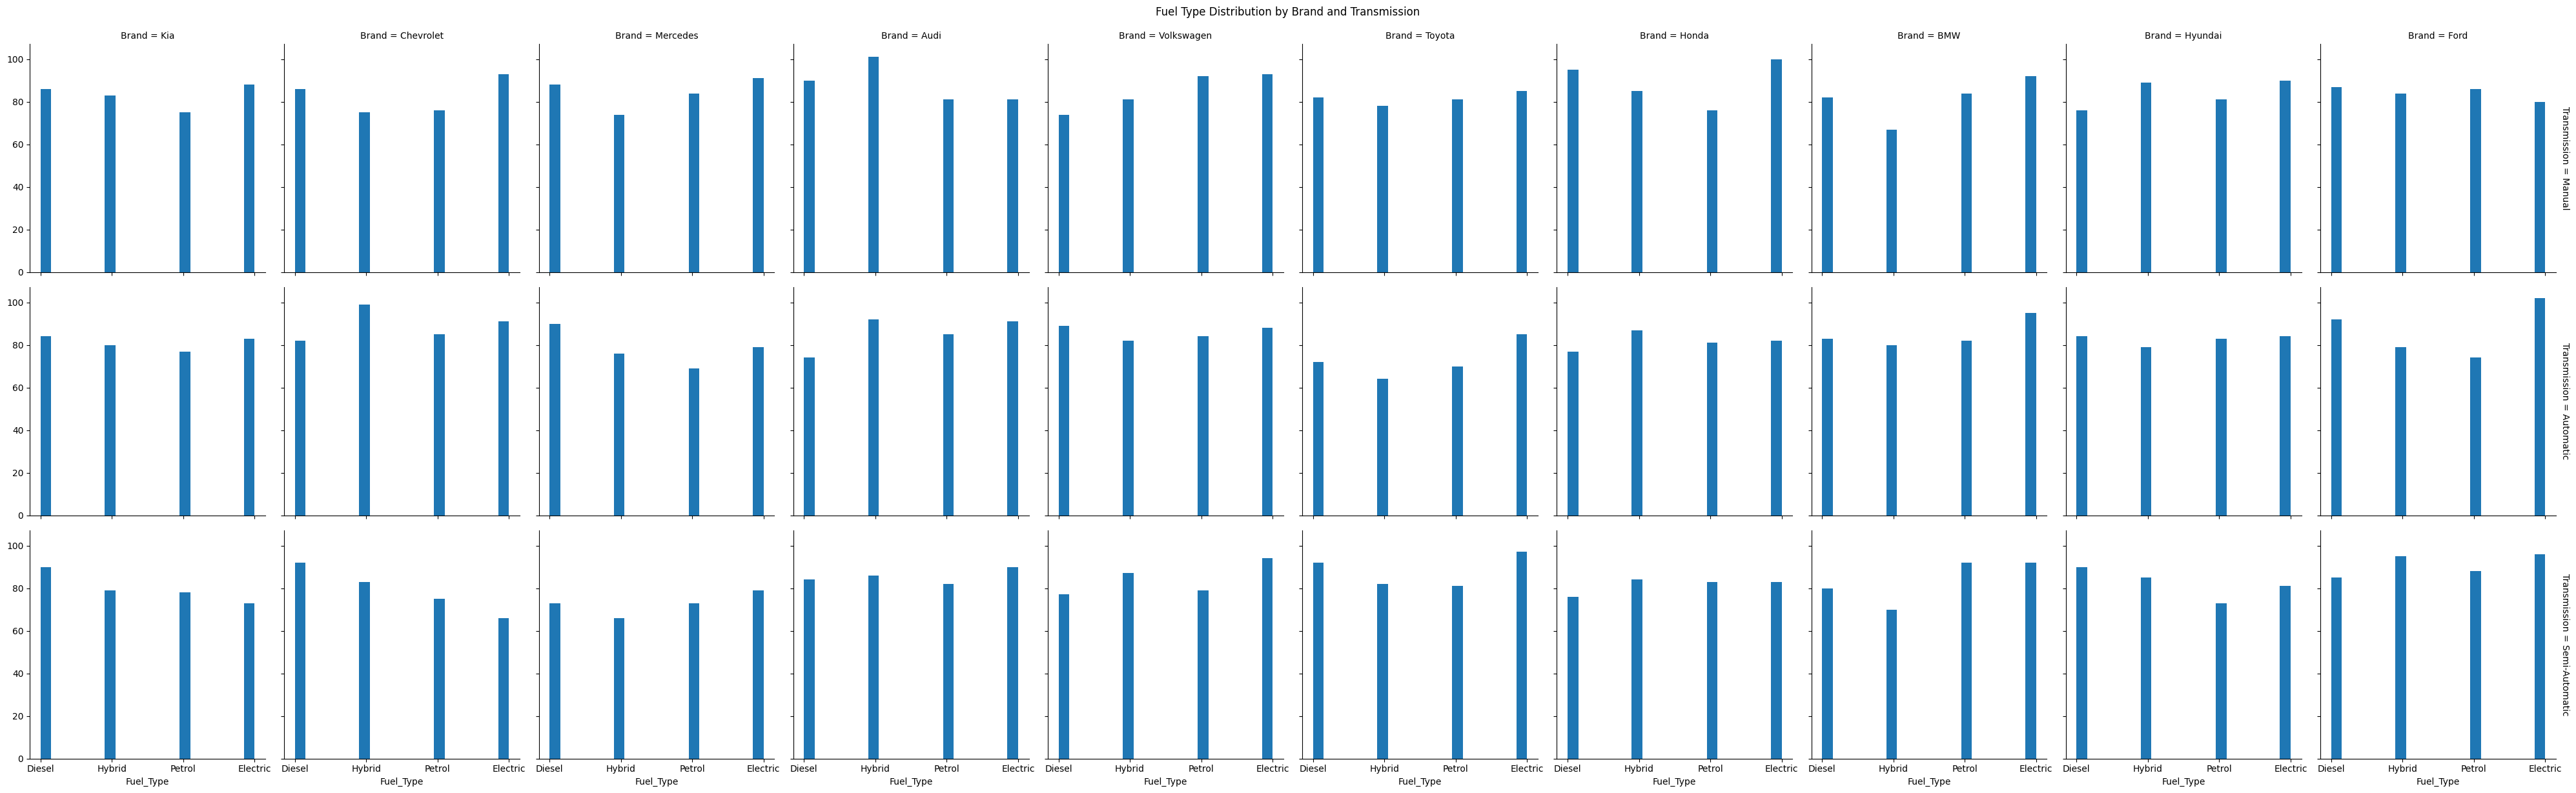

In [47]:
g = sns.FacetGrid(car, col="Brand", row="Transmission", margin_titles=True, height=4)
g.map(plt.hist, "Fuel_Type", bins=20)
g.fig.suptitle("Fuel Type Distribution by Brand and Transmission", y=1.02)
plt.show()

## 3d Scatter Plot


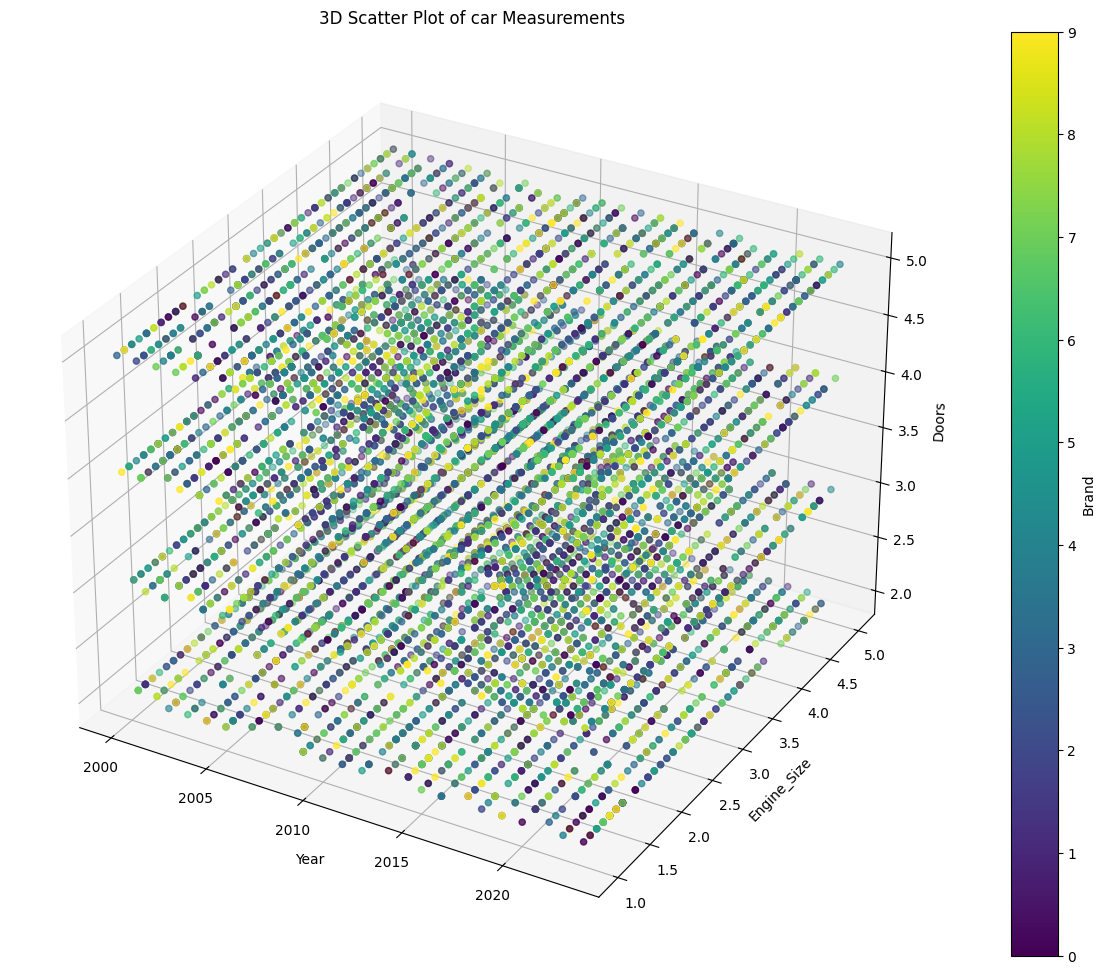

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(car['Year'],
                     car['Engine_Size'],
                     car['Doors'],
                     c=car['brand_encoded'],
                     cmap='viridis')

ax.set_xlabel('Year')
ax.set_ylabel('Engine_Size')
ax.set_zlabel('Doors')
ax.set_title('3D Scatter Plot of car Measurements')

plt.colorbar(scatter, label='Brand')
plt.show()


## Correlation

In [53]:
from scipy.stats import pointbiserialr

# 'Brand' is target variable
# Converting 'Brand' to binary (e.g., Adelie vs. non-Adelie)
car['Brand_binary'] = (car['Brand'] == 'Adelie').astype(int)

num_cols = car.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if col != "Brand_binary":
        correlation, p_value = pointbiserialr(car[col], car["Brand_binary"])
        print(f"Correlation between {col} and Brand (Adelie vs. non-Adelie): {correlation:.2f} (p-value: {p_value:.3f})")


Correlation between Year and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between Engine_Size and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between Mileage and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between Doors and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between Owner_Count and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between Price and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between brand_encoded and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between model_encoded and Brand (Adelie vs. non-Adelie): nan (p-value: nan)
Correlation between transmission_encoded and Brand (Adelie vs. non-Adelie): nan (p-value: nan)


C:\Users\liann\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


## Chi-Square Test


In [55]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming 'car' is your DataFrame
cat_cols = ['Brand', 'Model', 'Transmission']

for col in cat_cols:
    contingency_table = pd.crosstab(car[col], car['Brand'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col} vs Brand: p-value = {p:.3f}")


Chi-Square Test for Brand vs Brand: p-value = 0.000
Chi-Square Test for Model vs Brand: p-value = 0.000
Chi-Square Test for Transmission vs Brand: p-value = 0.673


# CONCLUSIONS FROM MULTIVARIATE ANALYSIS

## Brand Differentiation:

The scatter plots and pair plots likely reveal distinct clusters for each car Brand, indicating clear morphological differences between Kia, Mercedes, and Audi etc. cars.

These differences are probably most pronounced in door size and owner mass, suggesting these features are key for Brand identification.

## Correlations between Physical Traits:

There is likely a strong positive correlation between engine size and owners across all Brand, indicating that larger cars tend to have longer running.

Door number and fuel type may show a negative correlation, suggesting a trade-off in number of door that could relate to different accommodation strategies among Brand.

## Transmission:

Different cars likely show differences in owner preference and possibly engine size within each Brand, with larger engine generally being more number of doors.

The degree of transmission may vary between Brand, potentially reflecting different running strategies or owner’s choice.

## Price Variations:

Different results in prices might indicate significant differences in car manufacturing cost across Models, suggesting potential local adaptations or environmental influences on cars.

## Brand-Specific Designs:

Each Brand likely shows unique combinations of Design, such as Mercedes cars potentially having the popularity and engine power, while Toyata cars might have different design and purpose.

## Owner count:

The relationships between different owner count may provide insights into the popularity of each Brand, such as driving capabilities or design preferences.

## Engine Potential:

The clear differences between Engine power in Brand suggest that the potential could be used effectively for Brand classification in future studies or studies efforts.

## Fuel type variation:

Heat maps might reveal fuel type variation between multiple Brand, potentially uncovering subtle relationships that are not immediately apparent in simpler analyses.

## Price Variable Relationships:

Chi-square tests may show significant associations between price variables on Brand, Model, and transmission, indicating non-random distributions of cars across these categories.

## Data Quality and Reliability:

The consistency of relationships across different analyses supports the reliability of the dataset and the robustness of the observed patterns.

